In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("insurance.csv")

In [5]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [7]:
df.shape

(1340, 10)

In [18]:
pd.set_option("display.float_format", "{:.2f}".format)

In [83]:
sns.set(style = "whitegrid", palette= "Set1", font_scale= 1.1)

In [13]:
df.duplicated().sum()
df.isna().sum()
df.dropna(inplace= True)

In [14]:
df.shape

(1332, 10)

In [15]:
df.isna().sum().sum()

np.int64(0)

In [20]:
df.describe(include = "all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


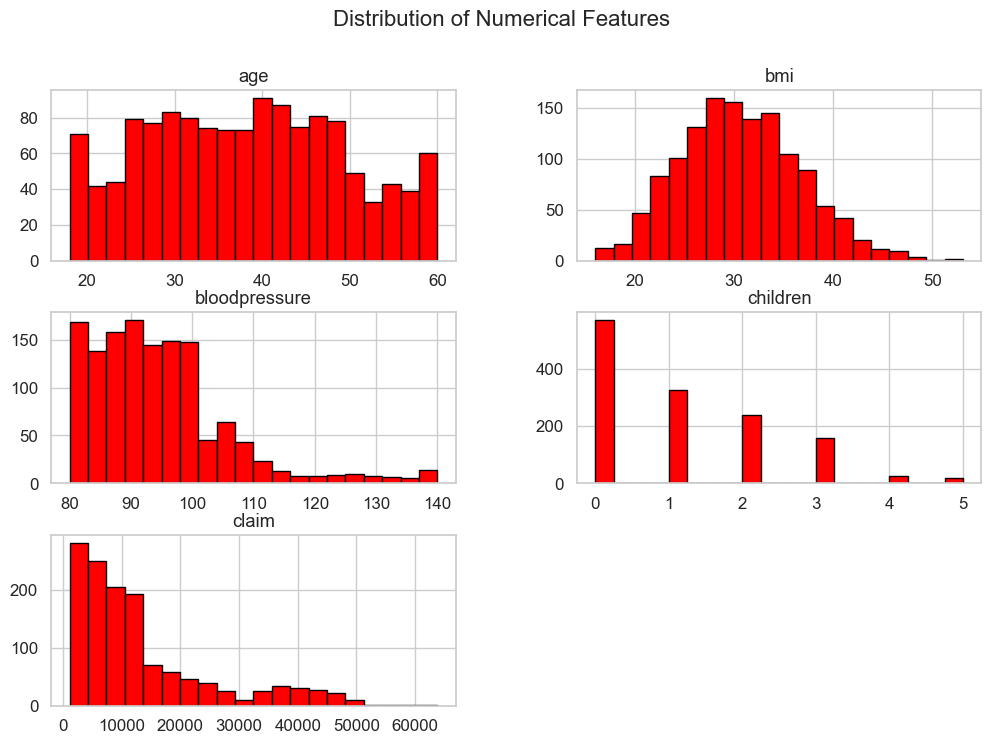

In [26]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins= 20, figsize= (12,8), color = "red", edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize = 16)
plt.show()

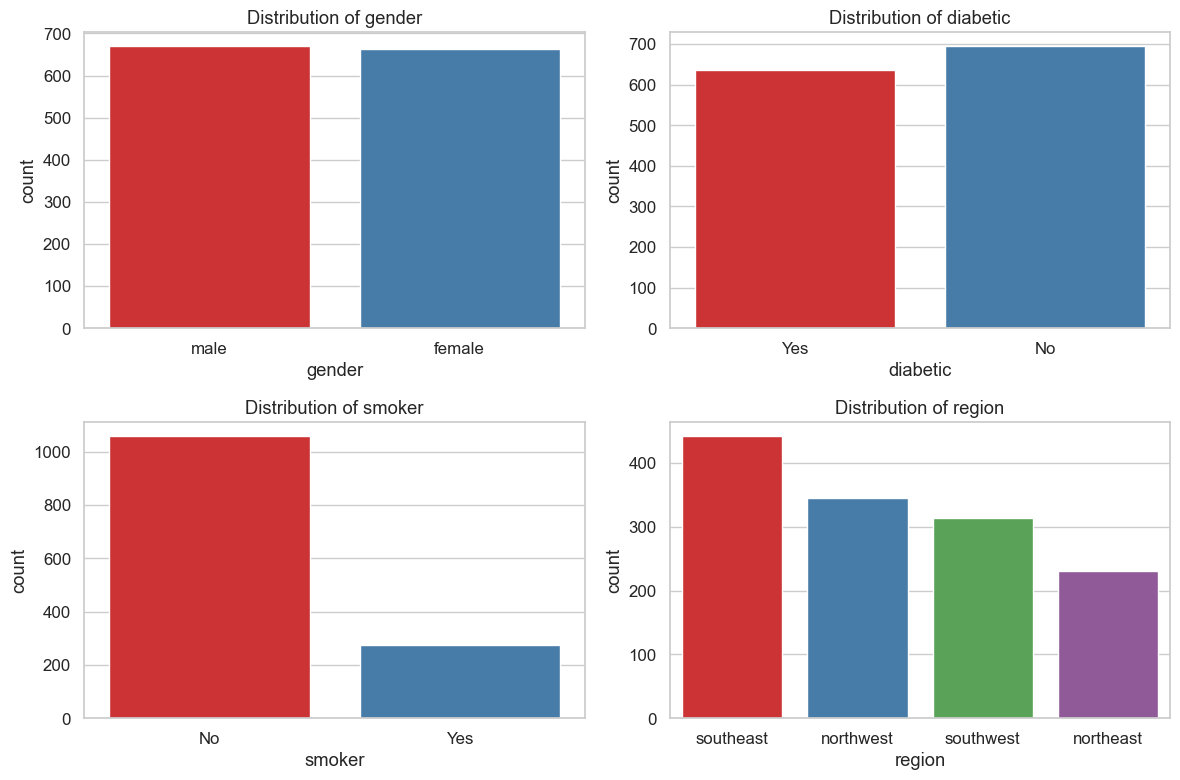

In [37]:
categorical_cols = ["gender", "diabetic", "smoker", "region"]
plt.figure(figsize= (12,8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data=df, x= col, hue= col, palette="Set1")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [38]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

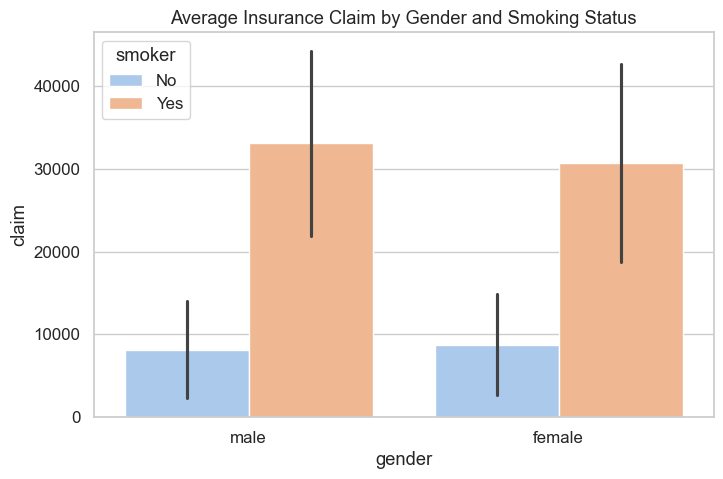

In [44]:
plt.figure(figsize= (8,5))
sns.barplot(data =df, x= "gender", y= "claim", hue = "smoker", estimator= "mean", errorbar= "sd")
plt.title("Average Insurance Claim by Gender and Smoking Status")
plt.show()

In [50]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()

In [51]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


Text(0, 0.5, 'Mean Claim')

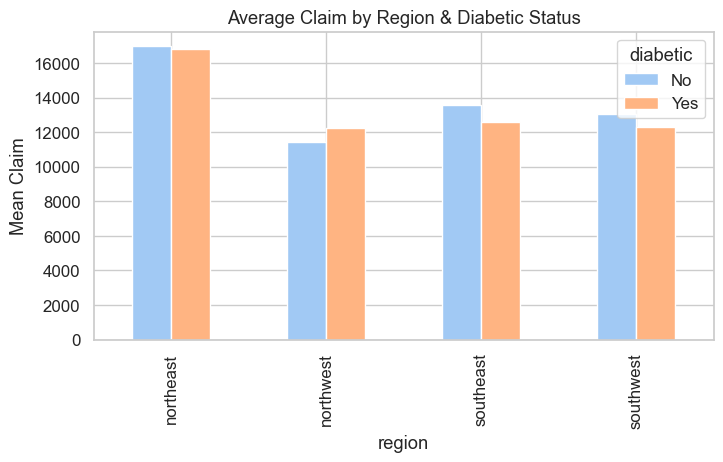

In [52]:
pivot_region_diabetic.plot(kind= "bar", figsize=(8,4))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")

In [54]:
pivot_table = pd.pivot_table(data=df, values= "claim", index= "region", columns= "smoker", aggfunc= "mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [55]:
pivot_table = pd.pivot_table(df, values = "claim", index= "children", columns= "diabetic", aggfunc= "mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [61]:
numeric_cols
df[numeric_cols].corr()

,age,bmi,bloodpressure,children,claim
age,1.00,-0.04,-0.06,-0.03,-0.03
bmi,-0.04,1.00,0.14,0.01,0.20
bloodpressure,-0.06,0.14,1.00,-0.03,0.53
children,-0.03,0.01,-0.03,1.00,0.06
claim,-0.03,0.20,0.53,0.06,1.00


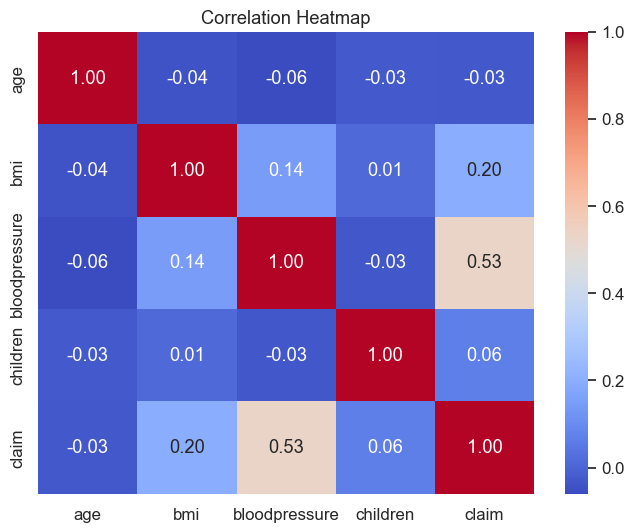

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot= True, cmap="coolwarm", fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show()

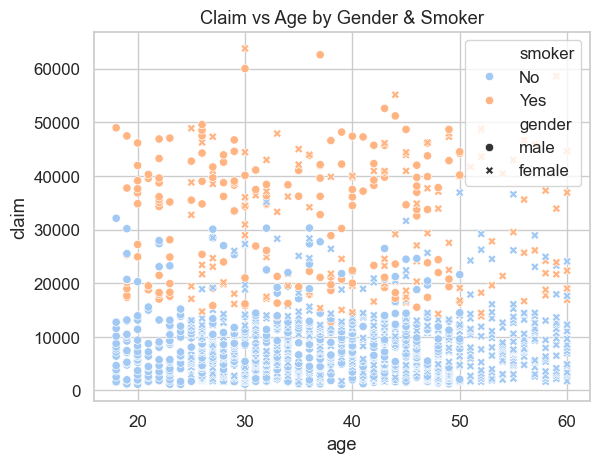

In [63]:
sns.scatterplot(data = df, x= "age", y= "claim", hue= "smoker", style= "gender")
plt.title("Claim vs Age by Gender & Smoker")
plt.show()

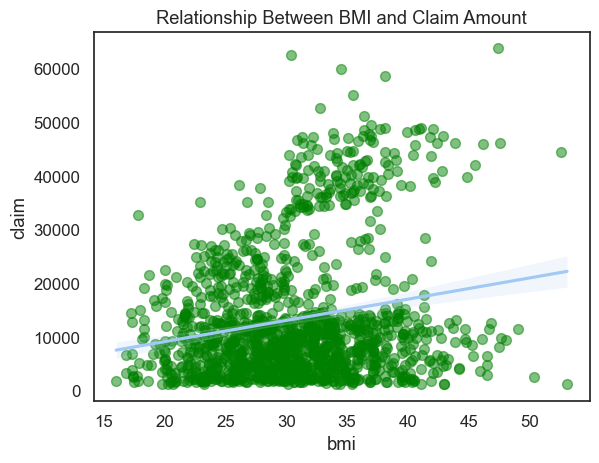

In [75]:
sns.set_style("white")
sns.regplot(data= df, x= "bmi", y= "claim", scatter_kws= {"alpha": 0.5, "color" : "green", "s": 50})
plt.title("Relationship Between BMI and Claim Amount")
plt.show()

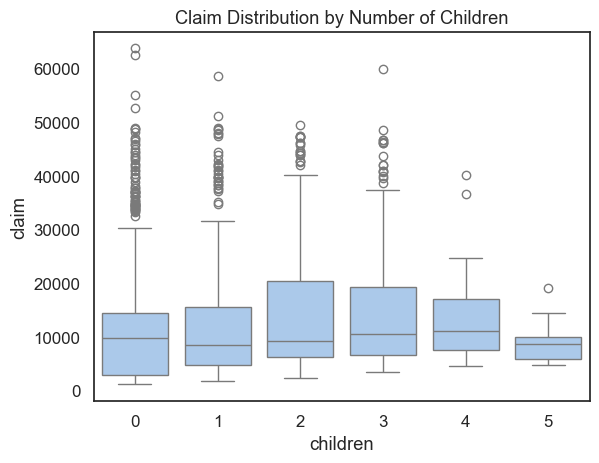

In [78]:
sns.boxplot(data = df, x= "children", y= "claim")
plt.title("Claim Distribution by Number of Children")
plt.show()

In [79]:
df["age_group"] = pd.cut(df["age"], bins = [0,18,30,45,60,100], labels = ["<18", "18-30", "31-45", "46-60", "60+"])

In [80]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [81]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_8932\1676664222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= "age_group", y = "claim", estimator= "mean", errorbar= "sd", palette="Set1")


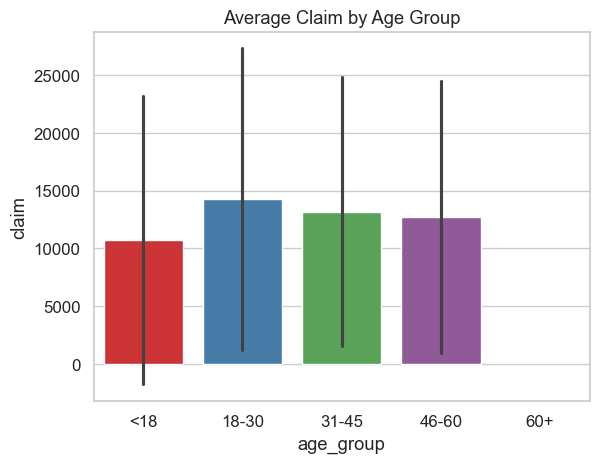

In [88]:
sns.barplot(data = df, x= "age_group", y = "claim", estimator= "mean", errorbar= "sd", palette="Set1")
plt.title( "Average Claim by Age Group")
plt.show()

In [85]:
df["bmi_category"] = pd.cut(df["bmi"], bins = [0,18.5,24.9,29.9,100], labels= ["Underweight", "Normal", "Overweight", "Obese"])
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

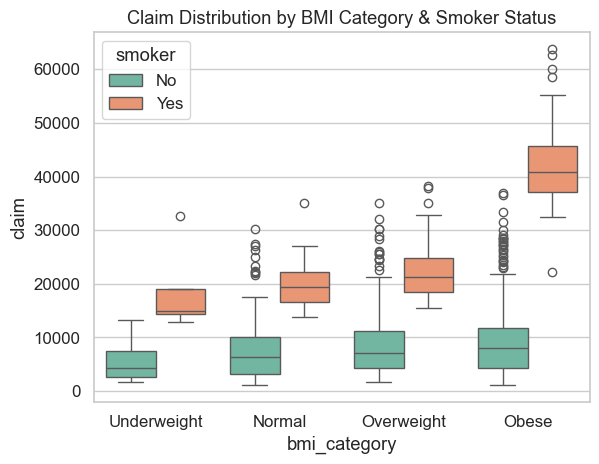

In [87]:
sns.boxplot( data = df, x= "bmi_category", y= "claim", hue= "smoker", palette="Set2")
plt.title("Claim Distribution by BMI Category & Smoker Status")
plt.show()

In [89]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x== "Yes").mean()*100),
     mean_claim = ("claim", "mean") 
     ).reset_index()

In [90]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


C:\Users\HP\AppData\Local\Temp\ipykernel_8932\1529435100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = region_stats, x="region", y= "smoker_rate", ax = ax1, alpha =0.6, palette= "Set2")


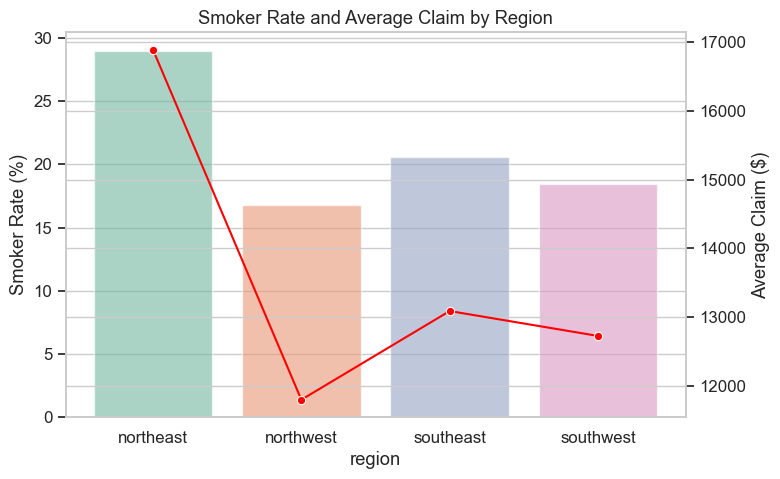

In [95]:
fig, ax1 = plt.subplots(figsize = (8,5))
sns.barplot(data = region_stats, x="region", y= "smoker_rate", ax = ax1, alpha =0.6, palette= "Set2")
ax2= ax1.twinx()
sns.lineplot(data= region_stats, x= "region", y= "mean_claim", ax= ax2, color = "red", marker = "o")

ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate and Average Claim by Region")
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [98]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [99]:
X= df[["age", "gender", "bmi", "bloodpressure", "diabetic", "children", "smoker",]]
y= df["claim"]

In [100]:
cat_cols = ["gender", "diabetic", "smoker"]
label_encoders = {}

In [101]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl") 

C:\Users\HP\AppData\Local\Temp\ipykernel_8932\653063434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_8932\653063434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_8932\653063434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [102]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [103]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()

In [137]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [139]:
print(X_train.shape, X_test.shape)

(1065, 7) (267, 7)


In [142]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [144]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [148]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-3.2.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.2.0-py3-none-win_amd64.whl (101.7 MB)


In [149]:
from xgboost import XGBRegressor

In [150]:
def evaluate_model( model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return{"R2" : r2, "MAE" : mae, "RMSE" : rmse}

In [152]:
results = {}

In [155]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

best_poly_model = None
best_poly_score = -np.inf

for degree in [2,3]:
    poly = PolynomialFeatures(degree= degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression() 
    poly_lr.fit(X_train_poly, y_train)

    score = poly_lr.score(X_test_poly, y_test)

    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model

results[f"Polynomial Regression (deg = {degree})"] =  evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test)
print("Polynomial Regression models are trained")

rf = RandomForestRegressor()

rf_params = {
    "n_estimators" : [100, 200],
    "max_depth" : [None, 10, 20],
    "min_samples_split" : [2,5],
    "min_samples_leaf" : [1,2]

}

rf_grid = GridSearchCV(rf, rf_params, cv= 3, scoring= "r2", n_jobs= -1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Random Forest training is completed, best parameters:", rf_grid.best_params_)


svr = SVR()

svr_params = {
    "kernel" : ["rbf", "poly", "linear"],
    "C" : [1,10,50],
    "epsilon" : [0.1,0.2,0.5],
    "degree" : [2,3]
}

svr_grid = GridSearchCV(svr, svr_params, cv = 3, scoring= "r2", n_jobs= -1, verbose=0)
svr_grid.fit(X_train, y_train)

best_svr = svr_grid.best_estimator_

results["SVR"] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)

print("SVR training is completed, best parameters:", svr_grid.best_params_)


xgb = XGBRegressor(objective= "reg:squarederror")

xgb_params = {
    "n_estimator" : [100,200],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.01, 0.05, 0.1],
    "subsample" : [0.8,1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv= 3, scoring= "r2", verbose=0, n_jobs= -1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("XGBoost training is completed, best parameters:", xgb_grid.best_params_)


Linear Regression model trained
Polynomial Regression models are trained
Random Forest training is completed, best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
SVR training is completed, best parameters: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training is completed, best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimator': 100, 'subsample': 0.8}


In [156]:
results

{'Linear Regression': {'R2': 0.7259054365367188,
  'MAE': 4864.027087132194,
  'RMSE': np.float64(6299.944966491502)},
 'Polynomial Regression (deg = 2)': {'R2': 0.7818356867241341,
  'MAE': 4323.385939092617,
  'RMSE': np.float64(5620.5446282070725)},
 'Random Forest': {'R2': 0.8149039243195059,
  'MAE': 4015.096198455162,
  'RMSE': np.float64(5177.0832707087175)},
 'SVR': {'R2': 0.5196649647407077,
  'MAE': 5870.930480682619,
  'RMSE': np.float64(8339.858407142401)},
 'XGBoost': {'R2': 0.8267322964589165,
  'MAE': 3864.6935587107914,
  'RMSE': np.float64(5008.934522348044)}}

In [157]:
df_results = pd.DataFrame(results).T.sort_values(by = "R2", ascending= False)
df_results

,R2,MAE,RMSE
XGBoost,0.83,3864.69,5008.93
Random Forest,0.81,4015.10,5177.08
Polynomial Regression (deg = 2),0.78,4323.39,5620.54
Linear Regression,0.73,4864.03,6299.94
SVR,0.52,5870.93,8339.86


In [158]:
models = {
    "Linear Regression" : lr,
    "Polynomial Regression" : poly_lr,
    "Random Forest" : best_rf,
    "SVR" : best_svr,
    "XGBoost" : best_xgb
}

In [159]:
best_r2 = df_results["R2"].max()

In [160]:
best_r2 

0.8267322964589165

In [161]:
top_model = df_results[df_results["R2"] == best_r2]

In [162]:
top_model

,R2,MAE,RMSE
XGBoost,0.83,3864.69,5008.93


In [163]:
best_model = models[top_model.index[0]]

In [164]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=100,
             n_estimators=None, n_jobs=None, ...)

In [166]:
joblib.dump(best_model, "best_model.pkl")
print(f"Best model selected: {top_model.index[0]}")

Best model selected: XGBoost
